In [1]:
import cv2

img = cv2.imread('./GrandmaCan_python_opencv-main/shape.jpg')
imgContour = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(img, 150, 200)
contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    cv2.drawContours(imgContour, cnt, -1, (255, 0, 0), 4)
    area = cv2.contourArea(cnt)
    if area > 500:
        # print(cv2.arcLength(cnt, True))
        peri = cv2.arcLength(cnt, True)
        vertices = cv2.approxPolyDP(cnt, peri * 0.02, True)
        corners = len(vertices)
        x, y, w, h = cv2.boundingRect(vertices)
        cv2.rectangle(imgContour, (x, y), (x+w, y+h), (0, 255, 0), 4)
        if corners == 3:
            cv2.putText(imgContour, 'triangle', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        elif corners == 4:
            cv2.putText(imgContour, 'rectangle', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        elif corners == 5:
            cv2.putText(imgContour, 'pentagon', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        elif corners >= 6:
            cv2.putText(imgContour, 'circle', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)



cv2.imshow('img', img)
cv2.imshow('canny', canny)
cv2.imshow('imgContour', imgContour)
cv2.waitKey(0)

113

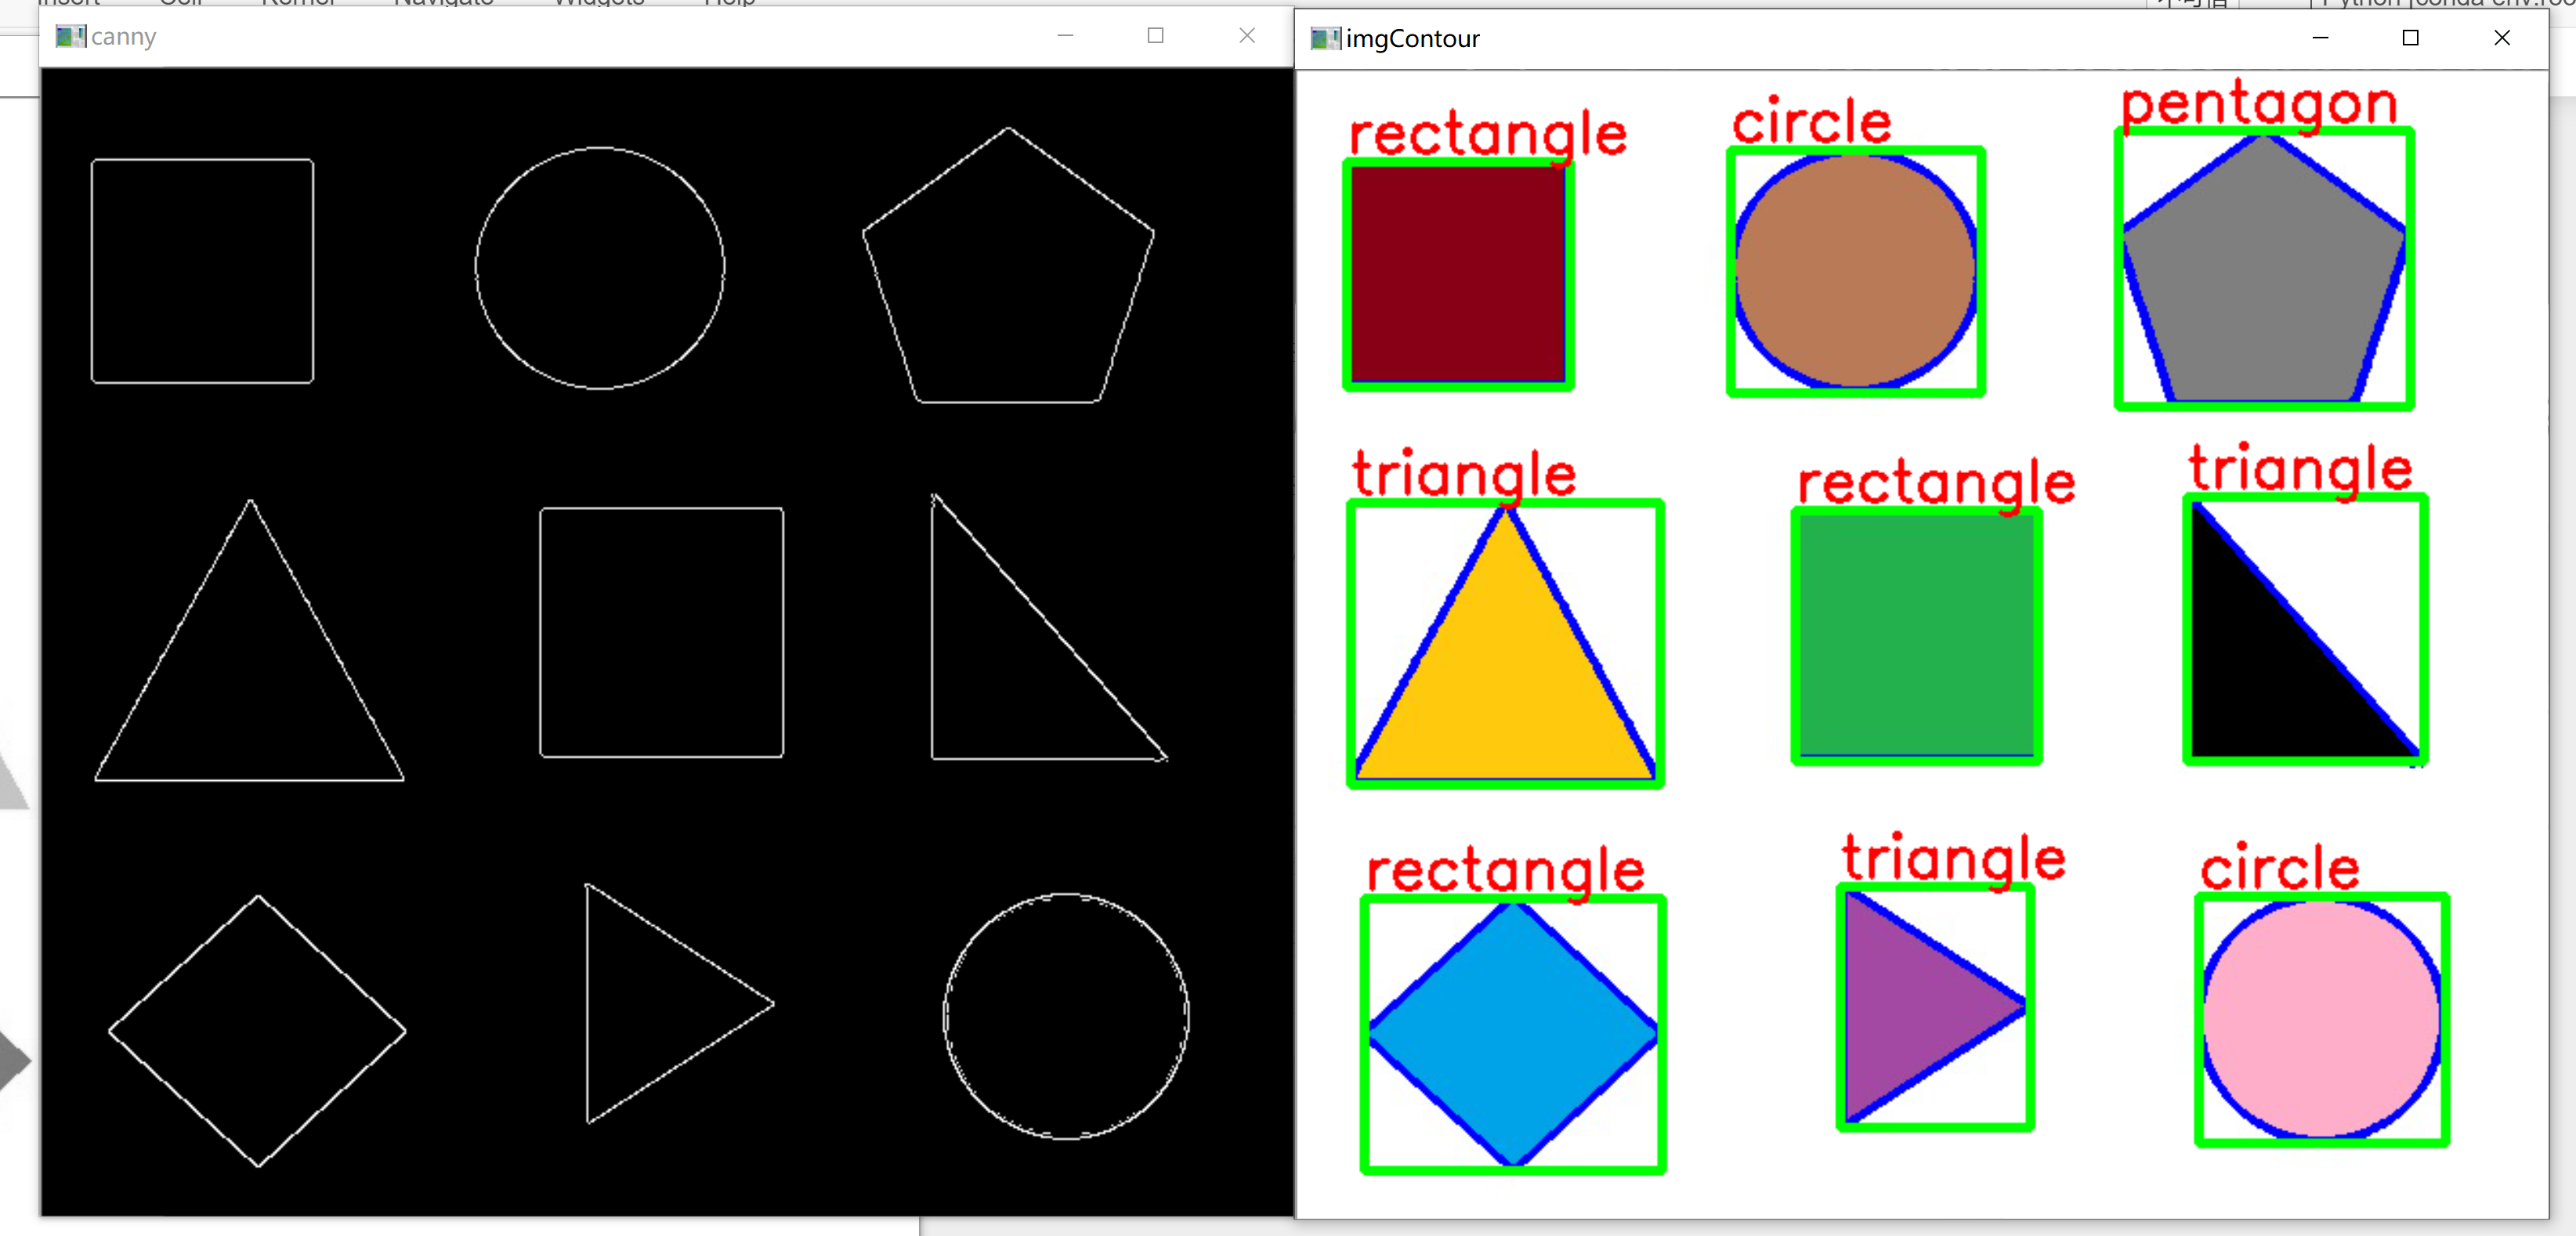